# **${\Large\text{Criptografía - Segundo Parcial}}$**

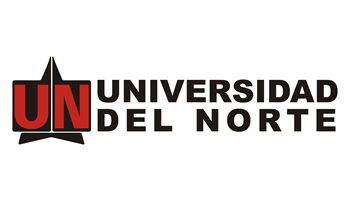

---

## **Nombre del Estudiante:** Juan Andres Chaverra Demoya
## **Código:** 200150715

## **Indicaciones:**

1. No hay preguntas.
2. No altere ni cambie nada del enunciado de su examen, esto podría conllevar a la anulación del mismo.
3. Responda de manera clara y concisa todas las preguntas (recuerde emplear el lenguaje apropiado en las respuestas), utilice un cuaderno de Jupyter para ello.
4. Una vez finalice el examen envíe, únicamente, el cuaderno de Jupyter con los códigos y las respuestas.
5. El examen debe ser desarrollado de manera individual, puede emplear las diapositivas y los códigos desarrollados durante las sesiones de las clases.
6. **El examen finalizará a las 6:30 p.m. del 18 de abril del 2024**, después de esto el enlace para enviar el examen se cerrará. Asegúrese de enviar el examen antes de la hora de finalización, no se aceptarán examenes enviados por ningún otro medio.

In [1]:
%pip install sympy
%pip install pycryptodome

Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.8 MB 550.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 950.9 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 1.3 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.8 MB 2.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.2/1.8 MB 3.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.8 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.9 MB/s eta 0:00:00


In [2]:
import math
import random
from random import randint
from math import ceil, sqrt
from typing import Tuple, List
from Crypto.Hash import SHAKE128
from sympy import isprime, mod_inverse
from sympy.ntheory import factorint, discrete_log
from sympy.ntheory.modular import solve_congruence

### Funciones miscelaneas

In [3]:
def MCD(x, y):
    if (x < y):
        b = x
        a = y
    else:
        a = x
        b = y
    while (b > 0):
        r = a % b
        a = b
        b = r
    return a

In [4]:
def inverso_multiplicativo(numero: int, campo: int)->int:
    return mod_inverse(numero, campo)

In [5]:
def str_to_int(s: str) -> int:
  return int.from_bytes(bytes(s, 'utf-8'), 'big')

def int_to_str(i: int) -> str:
  size = len(hex(i)[2:]) // 2
  return i.to_bytes(size, 'big').decode("utf-8")

---

## **(1.0/5.0) Punto 1 - Esquema Trapdoor RSA**

1. (0.5/1.0) Dados los valores $p$, $q$ y $e$ calcule (de ser posible) el par de llaves $(p_k, s_k)$ para un esquema Trapdoor RSA:

    **Nota:** Cada celda con valores es un caso de prueba (Hay 5 en total).

### Codigo RSA

In [6]:
def Grsa(p, q, e):

    if not isprime(p):
        raise ValueError("p debe ser un número primo.")

    if not isprime(q):
        raise ValueError("q debe ser un número primo.")

    n = p * q
    d = pow(e, -1, (p - 1) * (q - 1))
    pk = (n, e)
    sk = (n, d)
    return (sk, pk)

In [7]:
def Frsa (pk, x):
    (n, e) = pk
    x %= n
    y = pow(x, e, n)
    return y

In [8]:
def Irsa (sk, y):
    (n, d) = sk
    y %= n
    x = pow(y, d, n)
    return x

### Resultados

In [9]:
# Caso de Prueba 1
p = 102102126048317824065924553577456916119565919873414244244233048881467738552899
q = 77241541738650712042367219526138773944765059798476911839747089409452893678661
e = 65537

In [10]:
(sk, pk) = Grsa(p, q, e)
print(f'pk: {pk}')
print(f'sk: {sk}')

pk: (7886525630766117295248388445020314750474006031706067564053791088550885250910329056831452070328751523724509950665654058143647955961832584608906000855988239, 65537)
sk: (7886525630766117295248388445020314750474006031706067564053791088550885250910329056831452070328751523724509950665654058143647955961832584608906000855988239, 6175814912134334890358767465506318160872125113343410492619506728344598958786026113939796705511394224742941018717705119059194281427221632513487595284547913)


In [11]:
# Caso de Prueba 2
p = 231640724051553263387379206730037830334681470756723555257553965001045945876483
q = 74187946803732457137947078554995352757010604002904587963229521209341658938871
e = 65537

In [12]:
(sk, pk) = Grsa(p, q, e)
print(f'pk: {pk}')
print(f'sk: {sk}')

ValueError: p debe ser un número primo.

In [ ]:
# Caso de Prueba 3
p = 9061204758109181717095727231450843001581854388881164220792659536731247015185246526817641022568731165975832292576650514962099924121697553088023695305291807
q = 8830540930976418097829253808848780264725744328991345671177661762346915519203371924703901566958928019257985587328239875182253176423053741675003390399609157
e = 65537

In [ ]:
(sk, pk) = Grsa(p, q, e)
print(f'pk: {pk}')
print(f'sk: {sk}')

pk: (80015339500441402875575851134296784350624626471863110155047813530025110677544513147267838307525477306026677228900175870876490322000256861212211462465517099240370513601449447170491929914815765055262738045563075469761249358072273678970238846210631780875538711049834173793631545233355377866937341198246634276699, 65537)
sk: (80015339500441402875575851134296784350624626471863110155047813530025110677544513147267838307525477306026677228900175870876490322000256861212211462465517099240370513601449447170491929914815765055262738045563075469761249358072273678970238846210631780875538711049834173793631545233355377866937341198246634276699, 22947164287513864947227491677512062832750810298589608242124657144770464854730139075680898133725091871260072913273094671607239202313118203556517912584332415947440431767938627615764791954430978133914357678144171748355491791063117780218225472132319974200853923807537428994864307636058861229664193611654022424233)


In [ ]:
# Caso de Prueba 4
p = 162297275530127459380225823747269160183663138631439733024349801572501535559463426911511541080248939210243973201454580747849628918303820892570832813915524929333050002776392261703709950109429717758433522760486561696976260972652207903640041409456370094486643517230070092349416537947447863407351426054920138762043
q = 117356774663291094243032004459925194252973055129341475759513649494438182587746725412823004454759404785912749662477685098943384283776780641061534696885773705517658802859648595345850592897686759579008970400620775852969724071347418277181230593772539036125535701570585316241319280880595038684813132677564614012741
e = 65537

In [ ]:
(sk, pk) = Grsa(p, q, e)
print(f'pk: {pk}')
print(f'sk: {sk}')

pk: (19046684792855235920720446748694293352748336371235658538704737381465483531399942564398013333313080654500399492843924218090766000372377502725337934365097596244600943129190739174066045044218969507617545712545999142372764339543470237333260083786124465335249805377104770776284171346920329346156017647704155516770058449934159612272626638712856983995873140896885799269063537995920563880556012459380759106416060942180075370311729121247941131883636960131904140236228893093410087069214436142926822755773443791478397305165842373186190797078054569351600981035227437099561143302876263230199635218019763067840689171840634369189863, 65537)
sk: (1904668479285523592072044674869429335274833637123565853870473738146548353139994256439801333331308065450039949284392421809076600037237750272533793436509759624460094312919073917406604504421896950761754571254599914237276433954347023733326008378612446533524980537710477077628417134692032934615601764770415551677005844993415961227262663871285698399587314089688579926906

In [ ]:
# Caso de Prueba 5
p = 26828712519563923256944081392435882266431113366062177422351224648937030660105968064130599604715760442951140550645523514409049941173886352518264849600348163
q = 11556599370391988379751300728930696670578256283757066927141192990054003477718348307983981255288019110586938777281850713951539418740117045962924166646705011
e = 65537

In [ ]:
(sk, pk) = Grsa(p, q, e)
print(f'pk: {pk}')
print(f'sk: {sk}')


ValueError: p debe ser un número primo.

2. (0.3/1.0) Utilizando los siguientes valores de $p$, $q$ y $e$ calcule $y_i = F_{RSA}(p_k, x_i)$ para los valores de $x_i$ dados.

In [ ]:
p = 9061204758109181717095727231450843001581854388881164220792659536731247015185246526817641022568731165975832292576650514962099924121697553088023695305291807
q = 8830540930976418097829253808848780264725744328991345671177661762346915519203371924703901566958928019257985587328239875182253176423053741675003390399609157
e = 65537

In [ ]:
(sk, pk) = Grsa(p, q, e)

In [ ]:
x_1 = 11099940199340803754074947933644310974073676975790838173799013128262530532347278282670397602119060126071517439050588291847225905862110241175522738998044041347220268898727815828293377024362251240460817370504474443789350862131275815962737802228670020792724881751262616664138343514750556963924471968620848997270
x_2 = 67312899121549770522530234270387863557435404315495070469556115938394054317817419115572054466352907707907853455812249313130033288896689573045911386931552762451729767886819888810240751288319848590682985105811531183054550148246635446653158967225610490338324155804171152326966701236167492206434077146668054912887
x_3 = 22541143333637160975172013904061258546661269636458162409626316077853008216231128312156250166056615153280075880736371404803766429361137624379413216975716020269434687493347756636246930374737262196486301113570737398881912154206997681790697277036687168500483510693166299378625347953173246406756015262720958435263

In [ ]:
Frsa(pk, x_1)

15688754573902041249610164097714828837223164301629995821076210648808249692178922431160569803083809565035211226733252981541201013723632138893512086259335360379565983635754789918588444591353332731124541949228912666414167851017038856249756539759170437489437313488235537606830041777974002784496312054465300062272

In [ ]:
Frsa(pk, x_2)

37419952409279681110852831536270351398189616380910798605629596672563869477537890922397868638184017161867293771024122665969941355158831891931386370181797029400808677725230563398507763490950150873746575222347894432829284283413541184531768843234352829075231570964669117344372913927702557349694521387002526264012

In [ ]:
Frsa(pk, x_3)

10538348603668101800058607543181397351687612436766450227192383175630594500088060494767543513802864119048470876225358937500138201955430579145715718496907416967961129694031815594119368430114320880637533039263238594672513635538626400582513079703655731668414915296673321646156130941413894226298397792182750906579

3. (0.2/1.0) Utilizando los siguientes valores de $p$, $q$ y $e$ calcule $x_i = I_{RSA}(s_k, y_i)$ para los valores de $y_i$ dados.

In [ ]:
p = 102102126048317824065924553577456916119565919873414244244233048881467738552899
q = 77241541738650712042367219526138773944765059798476911839747089409452893678661
e = 65537

In [ ]:
(sk, pk) = Grsa(p, q, e)

In [ ]:
y_1 = 465226497757535535412484829718767503239439063443325604073247767333802396466573541046297726940717190995236120837293377439209858383193747316142252973261035
y_2 = 7236726037695447336081346409304088808412601962504553299838586719968995212343427929731498358711442291289988518088175453632919500491278013068140557763687583

In [ ]:
Irsa(sk, y_1)

989766965947285484065497033371929173675810724220549669722260189710466489158017841381272278282673765745303041623862238837912797840443010812865920410133172

In [ ]:
Irsa(sk, y_2)

4263389201381049132915142776155493777142154556019265922971859519327391594533333537597547120573512417768272649224269508834425044228672144357918053807226593

## **(1.0/5.0) Punto 2 - Esquema de Cifrado RSA OAEP**

1. (1.0/1.0) Sea $l = 1024$ bits y $h = 128$ bits.
  - Dados los valores $p$, $q$ y $e$ calcule el par de llaves RSA $(p_k, s_k)$.
  - Cifre el mensaje $m$ utilizando los valores $r, d \in \mathcal{R}$ dados (en hexadecimal). Muestre el valor $x$ obtenido durante el proceso de cifrado y muestre el valor $y = F_{RSA}(p_k, x)$ obtenido al finalizar.
    - **Nota 1:** Recuerde utilizar los códigos ASCII de cada uno de los carácteres para codificar el mensaje $m$.
    - **Nota 2:** Para las funciones $H$ y $W$ utilice la función hash `SHAKE128` de la librería `pycryptodome`. Para instalarla en el Google colab ejecute `!pip install pycryptodome` en una celda

In [ ]:
l = 1024
h = 128

p = 152877714074817582799594060573922352932837948563160266736492026333108693655783904622376811857378895257746079731072175805487307050879698253282990457710103020470521799405109815310314440243366045576457650600881729375721941744196962605128364324031423421727666391141134615217379142960243197138173392363904056397897
q = 95707244915825118014408217076464856517146448223720277861643490381267273874375548164519738117636281315821357090252478883391357902985886067820869059905003566449634076994677760198992650018040494373202259885914122530903304413803229396296150957650550965120836040044529439953718751000249785634995114271241679683631
e = 65537

r = '9023ab9a87979dbf7da351047df6dfca'
d = 'fc85b53162816fa2de19bfce6aae91dc'
m = 'The most important words a man can say are, "I will do better."'

In [ ]:
class OAEP:
  def __init__(self, l: int, h:int, d:int = None):
    self.l = l
    self.t = 2* l
    self.h = h
    self.d = d

  def H(self, data):
      shake  = SHAKE128.new(data.to_bytes((self.t - self.h - 8) // 8, 'big'))
      return int(shake.read(self.h // 8).hex(), 16)

  def W(self, data):
    shake  = SHAKE128.new(data.to_bytes(self.h // 8, 'big'))
    return int(shake.read((self.t - self.h - 8) // 8).hex(), 16)

  def G(self, p: int, q: int, e: int):
      n = p*q;
      d = inverso_multiplicativo(e, (p-1)*(q-1))
      p_k = (n, e)
      s_k = (n, d)
      print("pk: ",p_k)
      print("sk: ",s_k)
      return s_k, p_k

  def E(self, pk: int, m: int, r: int, d: int):
      d_len = len((bin(self.d)[2:]))
      m_len = len((bin(m)[2:]))

      if self.d is not None:
          pad = bin(self.d)[2:] + "0" * (self.t - h - 8 - m_len -d_len - 2) + "01"
      else:
          pad = "0" * (self.t - self.h - 8 - m_len - 2) + "01"

      z = int(pad + bin(m)[2:], 2)

      z_ = self.W(r) ^ z
      r_ = self.H(z_) ^ r

      x = r_ << (self.t - self.h - 8) | z_

      print(f"x = {x}")
      assert(len(bin(x)[2:]) == self.t - 8)

      return Frsa(pk, x)

  def D(self, sk: int, y: int):
      x = Irsa(sk, y)
      r_ = x >> (self.t - self.h - 8)
      z_ = x ^ (r_ << (self.t - self.h - 8))
      r = self.H(z_) ^ r_
      z = self.W(r) ^ z_
      m = int(bin(z ^ (self.d << (self.t - 2*self.h - 8)))[3:], 2)
      return m

In [ ]:
d_int = int(d, 16)
r_int = int(r,16)

oaep = OAEP(l, h, d=d_int)
sk, pk = oaep.G(p, q,e)

pk:  (14631504823130051186833720742755865986201109031200407744262913239131644086378819662822722749445750464971609708368342090974693150723300153023544405954726420706226955306036357993279875921712718633586122632012349065235632975249854442530787243191557646147684498192494838443716840880731701679576837678605176870775259153318374088115049861127178688464979501616225632995573527515710443691799597194782946787284700383081020348504649240628948159205764900872238274483739142773303735745576652963062473835079886154910029813175353651787451025753344783946602728497349745849081126883180268498906598398497520267764522662368328413724007, 65537)
sk:  (14631504823130051186833720742755865986201109031200407744262913239131644086378819662822722749445750464971609708368342090974693150723300153023544405954726420706226955306036357993279875921712718633586122632012349065235632975249854442530787243191557646147684498192494838443716840880731701679576837678605176870775259153318374088115049861127178688464979501616225632995

In [ ]:
c = oaep.E(pk, str_to_int(m), r_int, d_int)
print("y= ",c)

x = 76606949982072022213228453103039195831791871840428368239486166661195679522808379491592189886164371796782836550451743624374909803784800773299239507459989125734446663492112522165798803697196132021406957500455060843065543813573360844395129652306555271639952286434482355065408995864321273652521209804758226511415205852720391704268208476455046012517392601359078616556128929904725493768201692887875787788320031774551034964745411498046120522016397038413303308813150026415023612725484780388270320524293546591595286670544715410072625443236577608103334001729278489744849367165094985770051792453103253743293083469242089590577
y=  30342276321019227804036176008357550345162023418088635040482616052825153892559012833617680158181278026813562788751399507139644290627820472346051503258544080514355004462433928493317053145004836512055172753014969688602900094536308056281210630279355149583449778185299511058101506964224643994979418455334566032338077005476672093734057524002035988128976972319569721731839259568371520

---

## **(1.0/5.0) Punto 3 - Problema del Logaritmo Discreto**

1. (1.0/1.0) Dados los valores de $p$, $g$ y $y$ calcular el valor $x$ utilizando el algoritmo de **"paso de bebe, paso de gigante"**. Adicionalmente, para cada caso de prueba (hay 5) debe mostrar los valores de $m$, $i_x$ y $j_x$.

### Codigo pasos de bebe, pasos de gigante

In [ ]:
def paso_bebe_paso_gigante(
            g: int,
            y: int,
            n: int,
            debug_log = False
        ) -> int:

        m = ceil(sqrt(n))
        if debug_log: print("m = ", m)

        # lookup es una tabla hash para almacenar tuplas (a, b) \in G X Z
        # a es usada como clave indice
        lookup = {}

        # Computar (g**j, j) para todo 0 <= j <= m
        for j in range(m):
            lookup[pow(g, j, n)] =  j

        b = pow(g, m * (n - 2), n)

        _y = y
        x = None

        # Computar y * (g*{-m})i para i = 0, 1, 2, ... hasta entonces i_x con y * (g{-m})*i_x
        for i in range(m):
            if _y in lookup:
                x = (i * m + lookup[_y]) % n
                if debug_log: print(f"ix = {i} | jx = {lookup[_y]}")
                string = ''
                return f'm = {m}\nix = {i}\njx = {lookup[_y]}\nx = {x}'

            _y = (_y * b) % n
        return f'm = {m}\nix = {i}\njx = {lookup[_y]}\nx = {x}'

### Resultados

In [ ]:
# Caso de Prueba 1
p = 1008944727839
g = 436852493433
y = 80867817509

In [ ]:
paso_bebe_paso_gigante(g, y, p)

'm = 1004463\nix = 953472\njx = 151723\nx = 957727497259'

In [ ]:
# Caso de Prueba 2
p = 1008944727839
g = 436852493433
y = 126340966889

In [ ]:
paso_bebe_paso_gigante(g, y, p)

'm = 1004463\nix = 108489\njx = 436069\nx = 108973622476'

In [ ]:
# Caso de Prueba 3
p = 1008944727839
g = 436852493433
y = 164854993923

In [ ]:
paso_bebe_paso_gigante(g, y, p)

'm = 1004463\nix = 703055\njx = 300431\nx = 706193034896'

In [ ]:
# Caso de Prueba 4
p = 1008944727839
g = 436852493433
y = 910144022518

In [ ]:
paso_bebe_paso_gigante(g, y, p)

'm = 1004463\nix = 908662\njx = 155087\nx = 912717513593'

In [ ]:
# Caso de Prueba 5
p = 1008944727839
g = 436852493433
y = 49545259835

In [ ]:
paso_bebe_paso_gigante(g, y, p)

'm = 1004463\nix = 439574\njx = 605329\nx = 441536424091'

---

## **(1.0/5.0) Punto 4 - Esquema de Cifrado ElGamal**

1. (0.2/1.0) Dado un valor $\alpha$, un número primo $p$ y un elemento generador $g$ calcular y mostrar $(p_k, s_k)$ resultantes de la generación de llaves de ElGamal utilizando los valores dados.

### Codigo ElGamal

In [ ]:
def Gen(alpha, q, g):
    if not isprime(q):
        raise ValueError("q debe ser un número primo.")
    u = pow(g, alpha, q)
    pk = u
    sk = alpha
    return pk, sk

In [ ]:
def Enc(pk, m, q, g, beta):
    if isinstance(m, int):
        m = str(m)

    # Convertir el mensaje completo a un número entero
    m_int = int.from_bytes(m.encode(), 'big')
    if not (1 < m_int < q):
        raise ValueError(f"El valor entero del mensaje '{m}' ({m_int}) debe estar en el rango de 1 a q-1.")

    v = pow(g, beta, q)
    c = (m_int * pow(pk, beta, q)) % q

    return v, c

In [ ]:
def Dec(sk, vc, q):
    (v, c) = vc

    w = pow(mod_inverse(v, q), sk, q)
    m_int = (c * w) % q
    try:
        # Calculamos el número de bytes a partir del valor máximo esperado en el cifrado
        num_bytes = max(1, (m_int.bit_length() + 7) // 8)
        m_bytes = m_int.to_bytes(num_bytes, byteorder='big')
        m = m_bytes.decode('utf-8', errors='ignore')  # Ignorar caracteres no decodificables
    except (ValueError, UnicodeDecodeError, OverflowError) as e:
        m = (f"<cannot decode {m_int}: {str(e)}>")

    return m

### Resultados

In [ ]:
alpha = 44235728213098551077425602704492607016359920981613272052626024323091463300482880298541827967837430887576328472751910496011121592139764866532359692545249145346708241664924261327829449535530913639968563645084107647986106025250782392055385273661543061358700959794349801873828534525091734163432712627959693466322
p = 164502193028554071572773380673262121890970567103098787083558972687654868443151285432627053033053072000260424623411579165922995742644281638505768536442810062575979476066397674879391609594727231903485090135678243649110521956763797073399979304867490513217414015789052165354717083683136329248045988596838745639543
g = 95397605525288378204358698941767152376570780885616886203054870846705451384086811730296287946254767796802429470762715340386221298673197168854676481382299540380875518199684563702117074297547557764819044408561171097263130974134719766490187777579363041095603026258899214230765139858647550712580831085114196512019

In [ ]:
(pk, sk) = Gen(alpha, p, g)
print(f'pk: {pk}')
print(f'sk: {sk}')

pk: 151158474933645961056109203843546757663499349704994753032344462176590045612277469424010507152938599881054324718700860339186411908384908868449443799062361609175755141536941336196209556949397507910519810299535179497103191237214847709868371078477624111558133485226442862166925545186872364562429628724456449964320
sk: 44235728213098551077425602704492607016359920981613272052626024323091463300482880298541827967837430887576328472751910496011121592139764866532359692545249145346708241664924261327829449535530913639968563645084107647986106025250782392055385273661543061358700959794349801873828534525091734163432712627959693466322


2. (0.4/1.0) Dado un valor $\beta$ y un mensaje $m$:
  - Codificar el mensaje $m$ como un número entero de $\mathbb{F}_{p}^*$.
    - **Nota:** Para ello utilice los códigos ASCII de cada uno de los carácteres.
  - Calcular y mostrar $(v, c) = E(p_k, M)$ con ElGamal, utilizando el $\beta$ dado y el valor $p_k$ generado en el inciso **1**.

In [ ]:
beta = 1674435797287954221334632204181841546464330290107923623942210552236484222083679006606991338204875162921537505044334242829398146213680515911546561003532481053511340400893917420383849309918369182487491981623929321347161779516300860326491830199554475284283107612032924929697179442226013402267076722291886004976
m = 'Life before death. Strength before weakness. Journey before destination.'

In [ ]:
(v, c) = Enc(pk, m, p, g, beta)
print(f'v: {v}')
print(f'c: {c}')

v: 137324271447635478843236577542990771979838039824420694674021920547730751754425432321313309992680135519515605301538107016710226681685115428635282089812718284963444098237424833170677882254583336632211906092922856390084574044180218711378866290635852995765592960407861997390351515894469542331753318177126039703612
c: 152385699516201214510197269090045156436382590334250371152843210082653800689842726846861192029855516501633488476592129373700810649348816715973725825739986780641546606500453649319868883209011495566645862720015543862738854028605223425278648895645016205980082904785954296959241192245343234216618341378041326876886


3. (0.4/1.0) Dado un texto cifrado $(v, c)$ con $v, c \in \mathbb{F}_{p}^*$:
  - Calcular $m = D(s_k, (v, c))$ con ElGamal, utilizando el valor $s_k$ generado en el inciso **1**.
  - Decodificar el número entero $m$ como una cadena de carácteres y mostrarla.
    - **Nota:** Para ello convierta cada byte al correspondiente carácter utilizando el código ASCII.

In [ ]:
v = 68061151581036716434892324158377054048188900523743874908698489105996914990262896768661881977846983773615022889533546058949562336174880904867521755870011084531901642697261435243761191875894067201992544525538048936053049390566477867608723507254180676340229106077392911507852355248583584948033867168598534756719
c = 69523011344786145101642032657815987921375318089731095568525610125234911341233953139836192784196094382143519342081211985332724352226158981239211946140210134621812415803764373047141297119036512929506081105143907943930942609377564301739840067655863765775883975776264774278146988355265292896498243587261096438860

In [ ]:
Dec(sk, (v, c), p)

"There's always another secret."

---

## **(1.0/5.0) Punto 5 - Curvas Elípticas**

### Codigo CE

In [ ]:
def inv(y, p):
    return abs(y) * (p - 1) % p

In [ ]:
class EllipticCurve:

    def __init__(self, a: int, b: int, p: int, G: Tuple[int, int] = None) -> None:
        self.a = a
        self.b = b
        self.p = p
        self.I = (None, None)
        self.G = G

        assert(((4 * a ** 3) + (27 * b ** 2)) % p != 0), "No es una curva valida"


    def __contains__(self, point: Tuple[int, int]) -> bool:
        x, y = point

        if x == y == None: return True
        return pow(y, 2, self.p) == (x**3 + self.a * x + self.b) % self.p


    def __iter__(self):
        yield self.I

        for x in range(0, self.p):
            for y in range(0, self.p):
                if (x, y) in self:
                    yield (x, y)
                    y_inv = y * (self.p - 1) % self.p
                    if y_inv != y:
                        yield (x, y_inv)
                    break


    def __len__(self):
        return len([p for p in self])


    def hasse(self):
        """Teorema de Hasse. Define el intervalo

        p + 1 - 2 raiz(p), p + 1+ 2*raiz(p)
        """

        lower = self.p + 1 - 2 * math.sqrt(self.p)
        upper = self.p + 1 + 2 * math.sqrt(self.p)

        return lower <= len(self) <= upper, (lower, upper)

    def add(self, P: Tuple[int, int], Q: Tuple[int, int] = None) -> Tuple[int, int]:
        """Adición de puntos en la curva P-256."""
        Q = P if Q is None else Q

        if not (P in self and Q in self):
            raise ValueError("One or more points are not on the curve")

        # Identidad
        if P == (None, None):  # P es el punto en el infinito
            return Q

        if Q == (None, None):  # Q es el punto en el infinito
            return P

        x1, y1 = P
        x2, y2 = Q

        # Inverso aditivo: P + (-P) = I
        if x1 == x2 and (y1 == -y2 % self.p):
            return (None, None)  # Retorna el punto en el infinito

        # Pendiente de la recta que pasa por P y Q
        if x1 != x2:
            # Caso general: P + Q
            s = ((y2 - y1) * pow(x2 - x1, -1, self.p)) % self.p
            x3 = (s ** 2 - x1 - x2) % self.p
        else:
            # Caso especial: P = Q
            s = ((3 * x1 ** 2 + self.a) * pow(2 * y1, -1, self.p)) % self.p
            x3 = (s ** 2 - 2 * x1) % self.p

        y3 = (s * (x1 - x3) - y1) % self.p

        return (x3, y3)

    def mult(self, k: int, P: Tuple[int, int]) -> Tuple[int, int]:
        Q = P if k >= 0 else (P[0], inv(P[1]))
        # Inicialización de T
        T = Q if k & 1 else self.I
        k >>= 1

        # Multiplicación a escalar
        while k:
            Q = self.add(Q, Q)
            if k & 1:
                T = self.add(T, Q)
            k >>= 1

        return T

In [ ]:
class CurveP256(EllipticCurve):

    def __init__(self) -> None:
        a = -3
        b = 41058363725152142129326129780047268409114441015993725554835256314039467401291
        p = 2**256 - 2**224 + 2**192 + 2**96 - 1

        x = 48439561293906451759052585252797914202762949526041747995844080717082404635286
        y = 36134250956749795798585127919587881956611106672985015071877198253568414405109

        G = (x, y)

        super().__init__(a, b, p, G)

        self.q = 2**256 - 2**224 + 2**192 - 89188191075325690597107910205041859247

In [ ]:
class ElGamal_EllipticCurve:

    def __init__(self, curve: EllipticCurve, q: int = None) -> None:
        if (curve.G == None):
            raise ValueError("La curva no tiene generador.")

        self.curve = curve
        self.q = q


    def G(self, a = None) -> Tuple[Tuple[int, int], int]:
        a = random.randrange(2, self.q) if a == None else a
        U = self.curve.mult(a, self.curve.G)
        return U, a


    def E(self, Pk: Tuple[int, int], M: Tuple[int, int], b: int = None, debug_log: bool = False):
        b = random.randrange(2, self.q) if b == None else b
        if debug_log: print(f"beta = {b}")

        V = self.curve.mult(b, self.curve.G)
        if debug_log: print(f"v = {V}")

        W = self.curve.mult(b, Pk)

        C = self.curve.add(M, W)
        if debug_log: print(f"c = {C}")

        return V, C


    def D(self, sk: int, V: int, C: int) -> int:
        W = self.curve.mult(sk, V)
        M = self.curve.add(C, (W[0], inv(W[1], self.curve.p)))
        return M

### Resultados

1. (0.2/1.0) Dado un valor $\alpha$ calcular y mostrar $(P_k, s_k)$ resultantes de la generación de llaves de ElGamal sobre $P256$ utilizando el $\alpha$ dado.

In [ ]:
alpha = 49394361616422599964014019193491345166895484294247844865706844939385217745368

In [ ]:
q = 2**256 - 2**224 + 2**192 - 89188191075325690597107910205041859247
curva = CurveP256()
elgp256 = ElGamal_EllipticCurve(curva,q)

pk, sk = elgp256.G(alpha)

print("pk: ",pk)
print("sk: ",sk)

pk:  (68677399818840155869257022989655895277586582512705242417828956982031401999307, 113756524292626188620929808493976545588184792528036839155393362378026277880721)
sk:  49394361616422599964014019193491345166895484294247844865706844939385217745368


2. (0.4/1.0) Dado un valor $\beta$ y un mensaje $m$ codificado a un punto $M \in P256$ calcular y mostrar $(V, C) = E(P_k, M)$ con ElGamal sobre $P256$, utilizando el $\beta$ dado y el valor $P_k$ generado en el inciso **1**.

In [ ]:
beta = 5050686223037428457163522873606705413769606780692729311451655228317041946908
M = (10078325695723211088410985734864258926108196424648752194418952354939491493398, 83162779257944430915141041076225903572090104654488309266745131800763293112040)

In [ ]:
(V, c) = elgp256.E(pk, M, b = beta)

print("V= ",V)
print("C= ",c)

V=  (74908489895388468511849649995282655629932143737712590487860102964692691649425, 72008375640736892483560943835467645736580993997262279774865059571460281878070)
C=  (18054726872265623170436504181994371252991018501766053811183174643253830905118, 85195715838013128159146729974992454908102647736397073998128753101600199273914)


3. (0.4/1.0) Dado un texto cifrado $(V, C)$ con $V, C \in P256$ calcular y mostrar $M = D(s_k, (V, C))$ con ElGamal sobre $P256$, utilizando el valor $s_k$ generado en el inciso **1**.

In [ ]:
V = (2434004794767819467175582817230662459650825356676103469405545454429680318241, 79611261854144246365773278903523410292936278444189607530029777634984404802972)
C = (66696184284133056663625569822082447378631654244235497519610873925850418397823, 26097515549380845956525349094006689605605092455559098522997977149154485710077)

In [ ]:
M = elgp256.D(sk, V, C)
print("M= ",M)

M=  (70080563902474660685014643574954286003305136526954517743428749117055603385364, 102817281760810435925299871406466683251351115534973220072977695964583963694190)
